In [88]:
import networkx as nx
import numpy as np
from py import hypergraph, opt
from py.utils import experiment, degree_sort, adjacency_matrix
from matplotlib import pyplot as plt
from scipy.stats import zipf

In [232]:
n = 50
a = 2
deg = (np.random.rand(n)*3)**5
# deg = zipf.rvs(a, size=n)**1.8
deg += np.random.randint(1, n/2, n)
deg = deg /4
deg = deg.astype(int)
deg = deg *2

# deg = deg * (1.1 - np.random.rand())
# deg = ((deg + 1.0)*2.0).astype(int)*2

g = nx.configuration_model(deg)
e = list(g.edges())
e = [E for E in e if E[0]!=E[1]]
G = hypergraph.hypergraph(e)
d = G.node_degrees()
d

array([ 10.,  38.,  48.,  32.,  20.,   8.,  18.,  12.,   2.,  42.,  72.,
         4.,  18.,  60.,  54.,  10.,  90.,  30.,   8.,  76.,  10.,   6.,
         2.,   4.,  30.,  14.,   6.,  84.,  26.,   6.,  68., 114.,   6.,
        16.,  10.,  14.,  42.,  10.,  12.,  32.,   2.,   8.,   4.,   6.,
        20.,   6.,   6.,  14.,   2.,  12.])

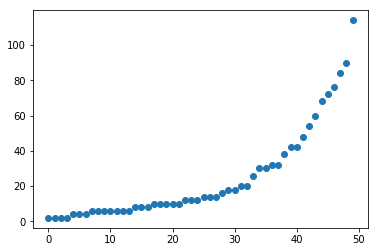

In [233]:
plt.scatter(np.arange(n), np.sort(d))

In [234]:
2*(G.m) / (G.n*(G.n-1))

0.5077551020408163

In [235]:
CL = np.outer(d, d)/d.sum()
np.fill_diagonal(CL, 0)

In [236]:
n_steps = round(G.m*np.log(G.m))
w, x, w2 = experiment(G, n_stub = 10000, n_vertex = n_steps/10, n_rounds = 1000, sample_after = 50, message_every = 100)

Completed stub-labeled MCMC with 10000 steps.
Round 0 of 1050 completed, 0 steps taken, acceptance rate = 0.2204
Round 100 of 1050 completed, 40010 steps taken, acceptance rate = 0.1842
Round 200 of 1050 completed, 80020 steps taken, acceptance rate = 0.1952
Round 300 of 1050 completed, 120030 steps taken, acceptance rate = 0.1649
Round 400 of 1050 completed, 160040 steps taken, acceptance rate = 0.197
Round 500 of 1050 completed, 200050 steps taken, acceptance rate = 0.1969
Round 600 of 1050 completed, 240060 steps taken, acceptance rate = 0.1898
Round 700 of 1050 completed, 280070 steps taken, acceptance rate = 0.1798
Round 800 of 1050 completed, 320080 steps taken, acceptance rate = 0.181
Round 900 of 1050 completed, 360090 steps taken, acceptance rate = 0.1794
Round 1000 of 1050 completed, 400100 steps taken, acceptance rate = 0.1792


/home/phil/.local/lib/python3.5/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


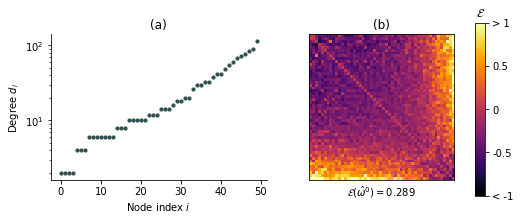

In [238]:
vmin = -1
vmax = 1

fig = plt.figure(figsize = (7, 3))

ax1 = fig.add_subplot(121)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.scatter(np.arange(n), 
            np.sort(d), 
            s = 10,
           edgecolors = 'darkslategrey',
           facecolors='darkslategrey')
ax1.set(xlabel = r'Node index $i$', 
        ylabel = r'Degree $d_i$',
        title = '(a)')
ax1.semilogy()

ax = fig.add_subplot(122)

err = (CL - w) / w

err = degree_sort(err,d)
err[np.isinf(err)] = 0
err[np.isnan(err)] = 0

im = ax.imshow(err, cmap = 'inferno', vmin = vmin, vmax = vmax)

cbar_ax = fig.add_axes([0.95, 0.13, 0.02, 0.80])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[vmin, vmin/2, 0, vmax/2, vmax])

cbar.ax.set_yticklabels(['< ' + str(vmin), str(vmin/2), '0' , str(vmax/2), '> ' + str(vmax)])  # vertically oriented colorbar
cbar_ax.set(title = r'$\mathcal{E}$')

ax.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    right=False,
    left=False,
    labelbottom=False,
    labelleft=False,
    length = 0)
v = np.abs(err).mean()

err_message = r"$\mathcal{E}(\hat{\omega}^0) = $" + "{:05.3F}".format(v)

ax.set(xlabel = err_message,
       title = '(b)')

plt.tight_layout()

# plt.colorbar()
plt.savefig('../../Downloads/synthetic.png', dpi=300, bbox_inches='tight')

In [ ]:
A = adjacency_matrix(G)
A = degree_sort(A, d)
plt.imshow(np.log(A + 1))
plt.colorbar()

In [ ]:
vmin = 0
vmax = 4
plt.imshow(degree_sort(np.log(CL+1), d), vmin = vmin, vmax = vmax)

In [ ]:
plt.imshow(degree_sort(np.log(w+1), d), vmin = vmin, vmax = vmax)